In [80]:
import torch
import numpy as np

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [81]:
torch.cuda.is_available()

True

In [82]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print("CPU")
else:
  print("GPU")

GPU


In [83]:
num_workers = 0
batch_size = 20
valid_size = 0.2

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_data = datasets.CIFAR10('data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [84]:
# obtain training indicies that will be used for validation
num_train = len(train_data)
indicies = list(range(num_train))
np.random.shuffle(indicies)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indicies[split:], indicies[:split]

In [85]:
#define samplers for obtaining traininf and validation batches

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [86]:
#prepare data loaders (combima dataser and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [87]:
# specify the image classes
classes = ['airplaine', 'automobile', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck']

In [88]:
for images, Labels in train_loader:
  print(images.shape)
  break

torch.Size([20, 3, 32, 32])


In [89]:
 # run the test harness for evaluating 4 mode!
def run_test_harness():
  trainX, trainY, testX, testY = load_dataset() #load dataset
  trainX, testX = prep_pixels(trainX, testX) # prepare pixel data
  model = define_model () # define model
  datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)# create data generator 
  it_train = datagen.flow(trainX, trainY, batch_size=64) # prepare iterator
  steps = int(trainX.shape[0] / 64) # Fit model
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=0)
  _, acc = model.evaluate(testX, testY, verbose=0) # evaluate model
  print('> %.3f' % (acc * 100.0))
  summarize_diagnostics(history) # learning curves

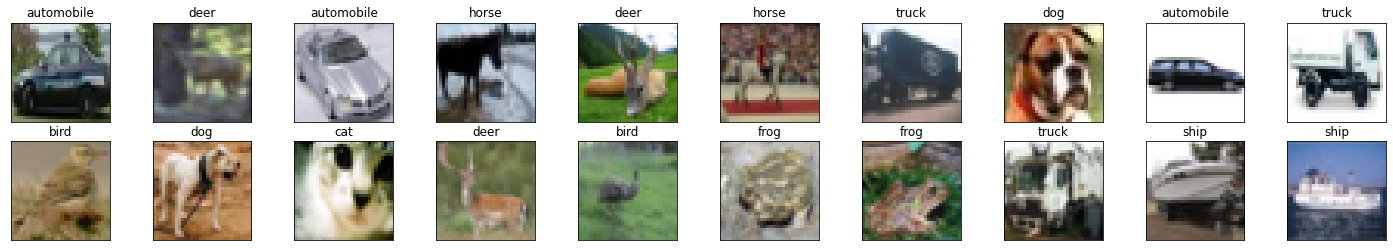

In [90]:
import matplotlib.pyplot as plt 
%matplotlib inline

# helper function to un-normalize and display an image 
def imshow(img):
  img = img/2+0.5 # unnormalize
  plt.imshow(np.transpose(img, (1, 2, 0))) # convert from Tensor image 
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels 
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[]) 
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])
 

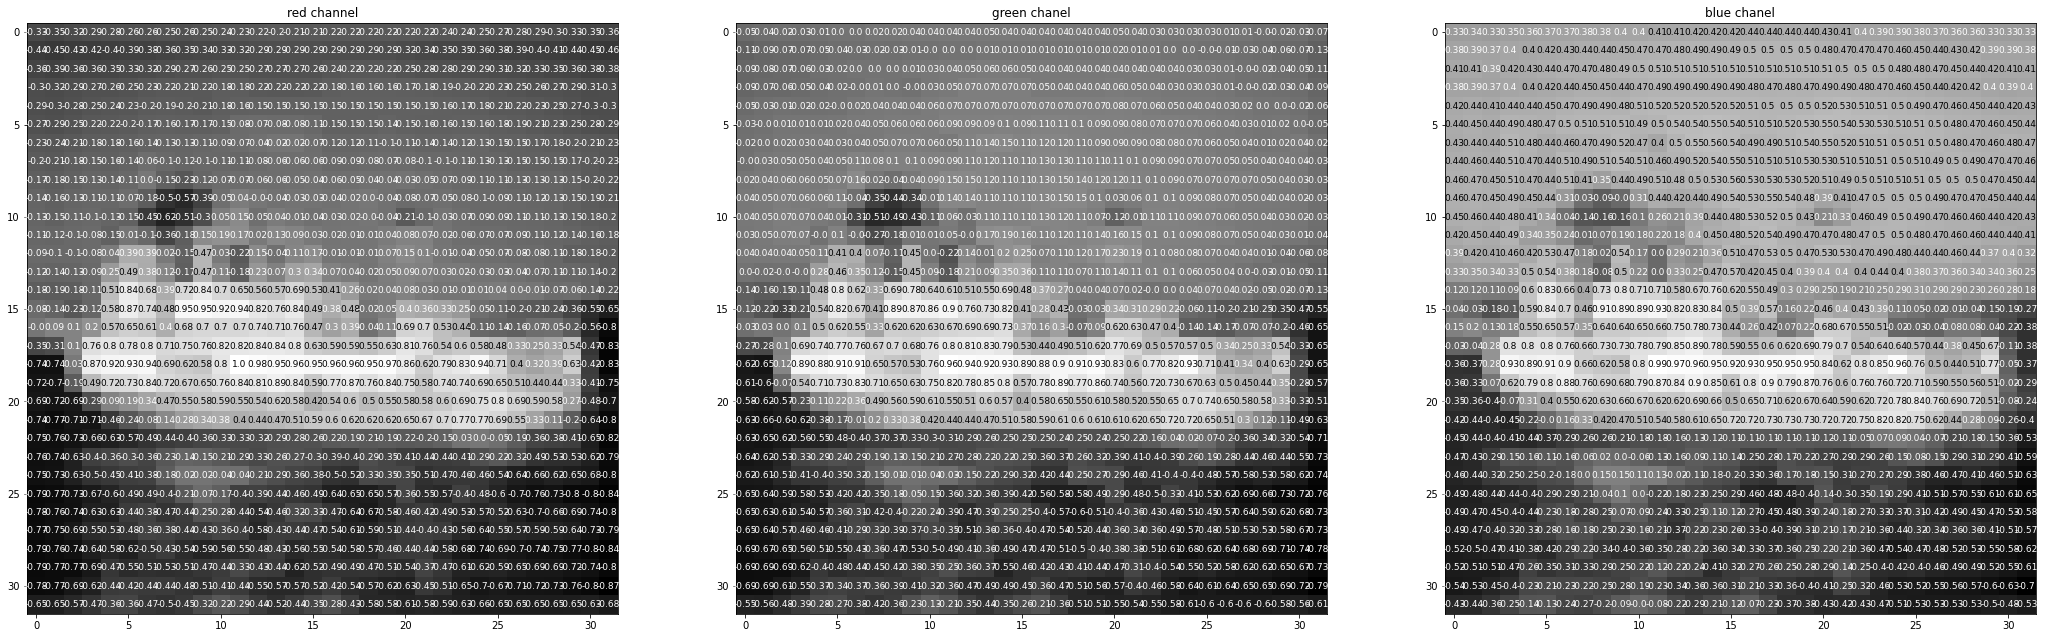

In [91]:
rgb_img = np.squeeze(images[19])
channels =['red channel', 'green chanel', 'blue chanel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
  ax = fig.add_subplot (1, 3, idx + 1) 
  img = rgb_img[idx]
  ax.imshow(img, cmap='gray')
  ax.set_title(channels[idx])
  width, height = img.shape 
  thresh = img.max()/2.5
  for x in range(width):
    for y in range (height):
      val = round(img[x][y],2) if img[x][y] !=0 else 0 
      ax.annotate(str(val), xy=(y,x),
            horizontalalignment='center',
            verticalalignment='center', size=9,
            color='white' if img[x] [y]<thresh else 'black')


In [92]:
64*4*4

1024

In [93]:
class Net(nn.Module): 
  def __init__ (self):
    super(Net, self).__init__()
    # convolutional layer
    #3*32*32 input size
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1) 
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1) 
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1) 
    # max pooling layer
    self.pool1 = nn.MaxPool2d(2, 2) 
    self.pool2 = nn.MaxPool2d(2, 2) 
    self.pool3 = nn.MaxPool2d(2, 2)
    # fully connected layers
    self.fc1 = nn.Linear(64 * 4 * 4, 512) 
    self.fc2 = nn.Linear(512, 64)
    self.fc3 = nn.Linear(64, 10)
    
    self.dropout = nn.Dropout (p=.5) 
    
    def forward(self, x):
      # add sequence of convolutional and max pooling layers 
      #3*32*32
      x = self.pool1(F.relu(self.conv1(x))) 
      #16*32*32-> 16*16*16
      x = self.pool2(F.relu(self.conv2(x))) 
      # [32,16,16]->[32*8*8]
      x = self.pool3(F.relu(self.conv3(x))) 
      #64*8*8->64*4*4

      x =x.view(-1, 64*4*4)

      x = self.dropout(F.relu(self.fcl(x))) 
      x = self.dropout(F.relu(self.fc2(x))) 
      x = self.fc3(x)
      return x

In [94]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=3, stride=1, padding=2),
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2))

        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(57800, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [95]:
model = Net1()
#move tensors to Gpu if CUDA is available
if train_on_gpu:
  model.cuda()

In [96]:
n_epochs = 5  # how many times model will go back and forth
num_classes = 10 # number of labels we should predict
learning_rate = 0.01

In [97]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() #loss function for defining if we  predicted right or wronge
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # optimisation function for creating gradient decent and learning

In [98]:
#List tp store loss to visualize
train_losslist = []
valid_loss_min = np.Inf # track change in validation loss
for epoch in range(1, n_epochs+1):
  train_loss = 0.0
  valid_loss = 0.0
      
      # train the model
  model.train()
  for data, target in train_loader:
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()
          # clear the gradients of all optimized variables
      optimizer.zero_grad()
          # forward pass: compute predicted outputs by passing inputs to the model 
      output = model(data)
          # calculate the batch loss
      loss = criterion(output, target)
          # backward pass: compute gradient of the loss with respect to model parameters 
      loss.backward()
          # perform a single optimization step (parameter update) 
      optimizer.step()
          # update training loss
      train_loss += loss.item() *data.size(0)
          # validate the model


model.eval()
for data, target in valid_loader:
  # move tensors to GPU if CUDA is available if traonignpu:
  data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
  output = model(data)
        # calculate the batch lo
  loss = criterion(output, target)
        # update average validation loss 
  valid_loss += loss.item() *data.size(0)

In [99]:
# calculate average losses
train_loss = train_loss/len(train_loader.dataset) 
valid_loss = valid_loss/len(valid_loader.dataset) 
train_losslist.append(train_loss)

In [100]:
# print training/validation statistics
print('Epoch: {} \tTraining Loss: {} \tValidation Loss: {}'.format(epoch, train_loss, valid_loss))
# save model if validation loss has decreased 
if valid_loss <= valid_loss_min:
  print ('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(
      valid_loss_min,
      valid_loss))
  torch.save(model.state_dict(), "model_cifar.pt")
  valid_loss_min=valid_loss

Epoch: 5 	Training Loss: 0.866320097219944 	Validation Loss: 0.2348657553076744
Validation loss decreased (inf --> 0.234866). Saving model ...


In [104]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10)) 
class_total = list(0. for i in range(10))

model .eval ()
# iterate over test data
for data, target in test_loader:
  # move tensors to GPU if CUDA is available if train _on_gpu:
  data, target = data.cuda(), target.cuda()
  # forward pass: compute predicted outputs by passing inputs to the model
  output = model(data)
  # calculate the batch loss
  loss = criterion(output, target)
  # update test loss
  test_loss += loss.item() *data.size (0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  # compare predictions to true label
  correct_tensor = pred.eq(target.data.view_as(pred))
  correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor)
  # calculate test accuracy for each object class 
  for i in range(batch_size):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset) 
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(10):
  if class_total[i] > 0:
    print ('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
         classes[i], 100 * class_correct[i] / class_total[i], 
         np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print ('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2da/%2d)' % (
     100. * np.sum(class_correct) / np.sum(class_total), 
     np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.159626

Test Accuracy of airplaine: 63% (630/1000)
Test Accuracy of automobile: 76% (763/1000)
Test Accuracy of  bird: 30% (305/1000)
Test Accuracy of   cat: 33% (333/1000)
Test Accuracy of  deer: 56% (564/1000)
Test Accuracy of   dog: 64% (643/1000)
Test Accuracy of  frog: 69% (694/1000)
Test Accuracy of horse: 66% (663/1000)
Test Accuracy of  ship: 72% (725/1000)
Test Accuracy of truck: 63% (634/1000)

Test Accuracy (Overall): 59% (5954a/10000)
